In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df=pd.read_csv("Food-Truck-LineReg.csv")
df

,1,2
0,5.5277,9.13020
1,8.5186,13.66200
2,7.0032,11.85400
3,5.8598,6.82330
4,8.3829,11.88600
...,...,...
91,5.8707,7.20290
92,5.3054,1.98690
93,8.2934,0.14454
94,13.3940,9.05510


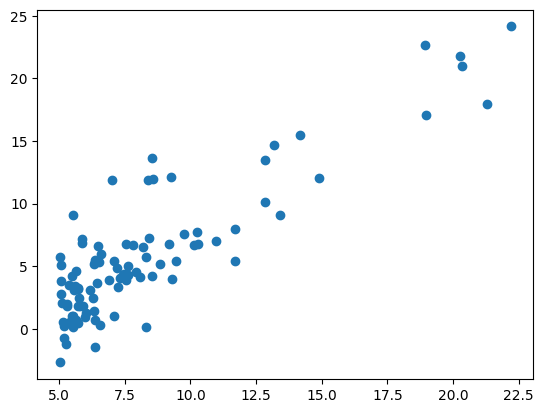

In [32]:
plt.scatter(df['1'],df['2'])
plt.show()

In [33]:
x_mean=df['1'].mean()
y_mean=df['2'].mean()
print("x_mean=",x_mean)
print("y_mean=",y_mean)

x_mean= 8.181151041666668
y_mean= 5.716709375000001


In [38]:
df['x-x_mean']=df['1']-x_mean
df['y-y_mean']=df['2']-y_mean
df['(x-x_mean)*(y-y_mean)']=df['x-x_mean']*df['y-y_mean']
df['(x-x_mean)^2']=df['x-x_mean']**2
df['(y-y_mean)^2']=df['y-y_mean']**2
df


,1,2,x-x_mean,y-y_mean,(x-x_mean)*(y-y_mean),(x-x_mean)^2,(y-y_mean)^2
0,5.5277,9.13020,-2.653451,3.413491,-9.057530,7.040802,11.651918
1,8.5186,13.66200,0.337449,7.945291,2.681130,0.113872,63.127643
2,7.0032,11.85400,-1.177951,6.137291,-7.229428,1.387569,37.666336
3,5.8598,6.82330,-2.321351,1.106591,-2.568785,5.388671,1.224543
4,8.3829,11.88600,0.201749,6.169291,1.244648,0.040703,38.060147
...,...,...,...,...,...,...,...
91,5.8707,7.20290,-2.310451,1.486191,-3.433771,5.338184,2.208763
92,5.3054,1.98690,-2.875751,-3.729809,10.726003,8.269944,13.911478
93,8.2934,0.14454,0.112249,-5.572169,-0.625470,0.012600,31.049072
94,13.3940,9.05510,5.212849,3.338391,17.402526,27.173794,11.144852


In [39]:
summation_column3=df['(x-x_mean)*(y-y_mean)'].sum()
summation_column4=df['(x-x_mean)^2'].sum()
summation_column5=df['(y-y_mean)^2'].sum()
print("Σ(x-x_mean)*(y-y_mean)=",summation_column3)
print("Σ(x-x_mean)^2",summation_column4)
print("Σ(y-y_mean)^2",summation_column5)

Σ(x-x_mean)*(y-y_mean)= 1739.5603117330625
Σ(x-x_mean)^2 1433.4508245398956
Σ(y-y_mean)^2 2775.2783647179626


In [40]:
corelation_coefficient=(summation_column3)/(summation_column4*summation_column5)**0.5
print("corelation coefficient=",corelation_coefficient)

corelation coefficient= 0.8721572919685902


In [81]:
def getMean(numbers):
 if len(numbers) == 0:
  return None
 else:
  current_sum = 0
 for i in numbers:
  current_sum += i
 current_avg = current_sum/len(numbers)
 return current_avg

In [82]:
def getStandardDeviation(numbers):
 if len(numbers) == 0:
  return 0
 else:
  mean = getMean(numbers)
  std_deviation = 0
 for i in numbers:
  std_deviation += (i - mean)**2
 return (std_deviation/len(numbers))**0.5

In [86]:
std_deviation_x = getstandardDeviation(df['x-x_mean'].tolist())
std_deviation_y = getstandardDeviation(df['y-y_mean'].tolist())
print(std_deviation_x, std_deviation_y)


3.8641660707441887 5.37672294548257


In [87]:
m=corelation_coefficient*(std_deviation_y/std_deviation_x)
print("m=",m)

m= 1.2135472539083578


In [88]:
c=df['2'].mean()-m*df['1'].mean()
print("c=",c)

c= -4.211504005424086


In [89]:
df['y_predicted']=m*df['1']+c
df

,1,2,x-x_mean,y-y_mean,(x-x_mean)*(y-y_mean),(x-x_mean)^2,(y-y_mean)^2,y_predicted
0,5.5277,9.13020,-2.653451,3.413491,-9.057530,7.040802,11.651918,2.496621
1,8.5186,13.66200,0.337449,7.945291,2.681130,0.113872,63.127643,6.126220
2,7.0032,11.85400,-1.177951,6.137291,-7.229428,1.387569,37.666336,4.287210
3,5.8598,6.82330,-2.321351,1.106591,-2.568785,5.388671,1.224543,2.899640
4,8.3829,11.88600,0.201749,6.169291,1.244648,0.040703,38.060147,5.961541
...,...,...,...,...,...,...,...,...
91,5.8707,7.20290,-2.310451,1.486191,-3.433771,5.338184,2.208763,2.912868
92,5.3054,1.98690,-2.875751,-3.729809,10.726003,8.269944,13.911478,2.226850
93,8.2934,0.14454,0.112249,-5.572169,-0.625470,0.012600,31.049072,5.852929
94,13.3940,9.05510,5.212849,3.338391,17.402526,27.173794,11.144852,12.042748


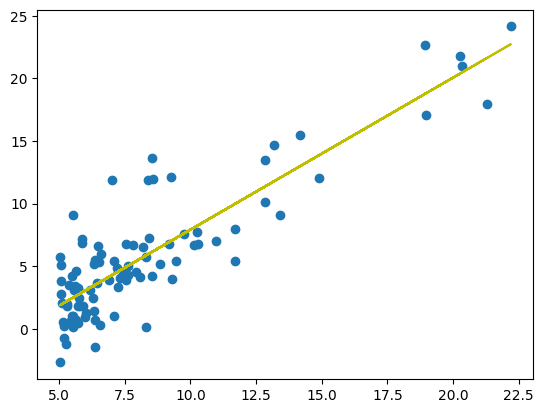

In [91]:
plot1=plt.scatter(df['1'],df['2'])
plot2=plt.plot(df['1'],df['y_predicted'],color='y')
plt.show()

In [93]:
SSR=sum((df['y_predicted']-y_mean)**2)
SSR


2111.0386393116246

In [97]:
SSE=((df['2']-df['y_predicted'])**2).sum()
SSE

664.2397254063369

In [98]:
SST=sum((df['2']-y_mean)**2)
SST

2775.2783647179617

In [101]:
tss_new=SSE+SSR
tss_new

2775.2783647179613

In [102]:
cost=SSE/96
cost

6.91916380631601